In [30]:
from __future__ import division
from collections import Counter
from functools import partial
from linear_algebra import dot
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math #pg 56 - Summerfield
import math, random

In [33]:
def sigmoid(t):
    return ((2 / (1 + math.exp(-t)))-1)

def neuron_output(weights, inputs):
    return sigmoid(dot(weights, inputs))

def feed_forward(neural_network, input_vector):
    outputs = []

    for layer in neural_network:

        input_with_bias = input_vector + [1]
        output = [neuron_output(neuron, input_with_bias) # calcula a saida do neurônio
            for neuron in layer]
            #print(output)
        outputs.append(output)

        # a saida de uma camada de neurônio é a entrada da proxima camada
        input_vector = output

    return outputs

# adiciona bias à entrada

# para cada camada

# acrescenta valor à saída memorizando

In [34]:

alpha = 0.08
def backpropagate(network, input_vector, target):
    # feed_forward calcula a saida dos neyronios usando sigmoide
    hidden_outputs, outputs = feed_forward(network, input_vector)
    # 0.5 * alpha* (1 + output) * (1 - output) calculo da derivada da sigmoide
    output_deltas = [0.5 * (1 + output) * (1 - output) * (output - target[i]) * alpha
        for i, output in enumerate(outputs)]

# ajuste dos pesos sinápticos para camada de saida (network[-1])
    for i, output_neuron in enumerate(network[-1]):
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            output_neuron[j] -= output_deltas[i] * hidden_output

# 0.5 * alpha* (1 + output) * (1 - output) cálculo da derivada da sigmóide
# retro-propagacao do erro para camadas intermediarias
    hidden_deltas = [ 0.5 * alpha * (1 + hidden_output) * (1 - hidden_output) * dot(output_deltas, [n[i] for n in network[-1]])
        for i, hidden_output in enumerate(hidden_outputs)]

In [35]:
def seno(x): # funcao a ser aproximada pela Rede Neural
    seno = [(math.sin(math.pi/180*x)*math.sin(2*math.pi/180*x))] #seno e uma lista
    # [(0.8+(math.sin(math.pi/180*x)*math.sin(2*math.pi/180*x)))*0.5]
    return [seno]

def predict(inputs):
    return feed_forward(network, inputs)[-1]

inputs = []
targets = []

In [36]:
random.seed(0) # valores iniciais de pesos sinápticos
input_size = 1 # dimensão do vetor de entrada
num_hidden = 6 # número de neurônios na camada intermediária
output_size = 1 # dimensao da camada de saida = 1 neuronio

#inserindo manualmente os vetores relativos à camada intermediária e à saida da Rede Neural
#hidden_Layer = [[-0.085, -0.09], [-0.033, -0.08], [-0.074, -0.063], [-0.075, -0.065], [-0.088, -0.076], [-0.077, -0.072]]
#output_layer = [[0.082, -0.09, 0.064, -0.08, 0.084, -0.075, 0.099]]

# cada neurônio da camada intermediária tem um peso sináptico associado à entrada
# e adicionando o peso do bias
hidden_layer = [[random.random() for _ in range(input_size + 1)]
                for _ in range(num_hidden)]
#print(hidden_layer)
# neurônio de saida tem um peso sináptico associado a cada neuronio da camada intermediária
# e adicionando o peso do bias
output_layer = [[random.random() for _ in range(num_hidden + 1)]
                for _ in range(output_size)]
# a rede inicializa com pesos sinapticos rsodômicos
network = [hidden_layer, output_layer]
#print(network)

In [37]:
for _ in range(300): #numero de ciclos da treinamento
    for x in range(360):
        inputs = seno(x)
        targets = seno(x)
        for input_vector, target_vector in zip(inputs, targets):
            backpropagate(network, input_vector, target_vector)
        #TREINAMENTO DA REDE NEURAL

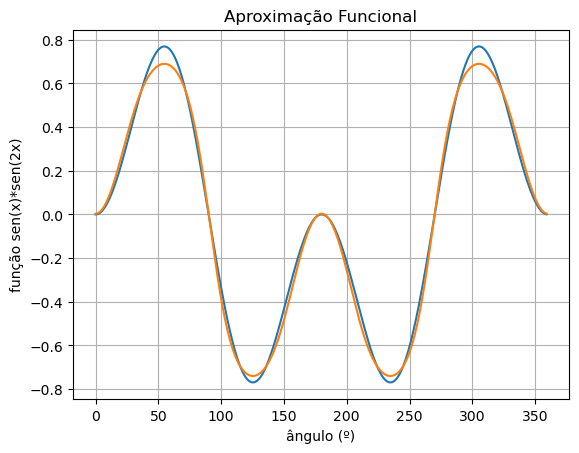

camada entrada [[0.8444218515250481, 0.7579544029403025], [0.420571580830845, 0.25891675029296335], [0.5112747213686085, 0.4049341374504143], [0.7837985890347726, 0.30331272607892745], [0.4765969541523558, 0.5833820394550312], [0.9081128851953352, 0.5046868558173903]]
camada saida [[0.638720809232562, 1.3656502318931323, 1.1733703037036793, 1.4000276949960124, 1.1300260069550683, 1.8794726650753237, -1.6303186924139055]]


In [38]:
# formatação do grafico
fig, ax = plt. subplots()
ax.set(xlabel='ângulo (º)', ylabel='função sen(x)*sen(2x)',
title='Aproximação Funcional')
ax.grid()
t = np.arange(0, 360, 1)

# teste da rede através de predict( )
saida = []
for x in range(360):
    inputs = seno(x)
    targets = seno(x)
    for input_vector, target_vector in zip(inputs, targets):
        sinal_saida = predict(input_vector)
        saida.extend(sinal_saida)

entrada = []
for x in range(360):
    entrada += seno(x) # criando o arranjo da função de entrada para o gráfico
ax.plot(t, entrada )
ax.plot(t, saida)
plt. show()

print ("camada entrada", hidden_layer )
print ("camada saida", output_layer )